# WORLD Happiness Report

# Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others

# Column Information


Dystopia::
        
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

Residual:
    
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. These residuals have an average value of approximately zero over the whole set of countries. Figure 2.2 shows the average residual for each country when the equation in Table 2.1 is applied to average 2014- 2016 data for the six variables in that country. We combine these residuals with the estimate for life evaluations in Dystopia so that the combined bar will always have positive values. As can be seen in Figure 2.2, although some life evaluation residuals are quite large, occasionally exceeding one point on the scale from 0 to 10, they are always much smaller than the calculated value in Dystopia, where the average life is rated at 1.85 on the 0 to 10 scale.

# Importing Requried Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

# Loading Dataset

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
##checking the shape of our dataset
df.shape

(158, 12)

we have 158 rows and 12 columns.

In [4]:
## Checking information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

observation:

1- All features have a correct datatype as per information given.

2- There is no null values in our dataset.

In [5]:
## Checking Null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

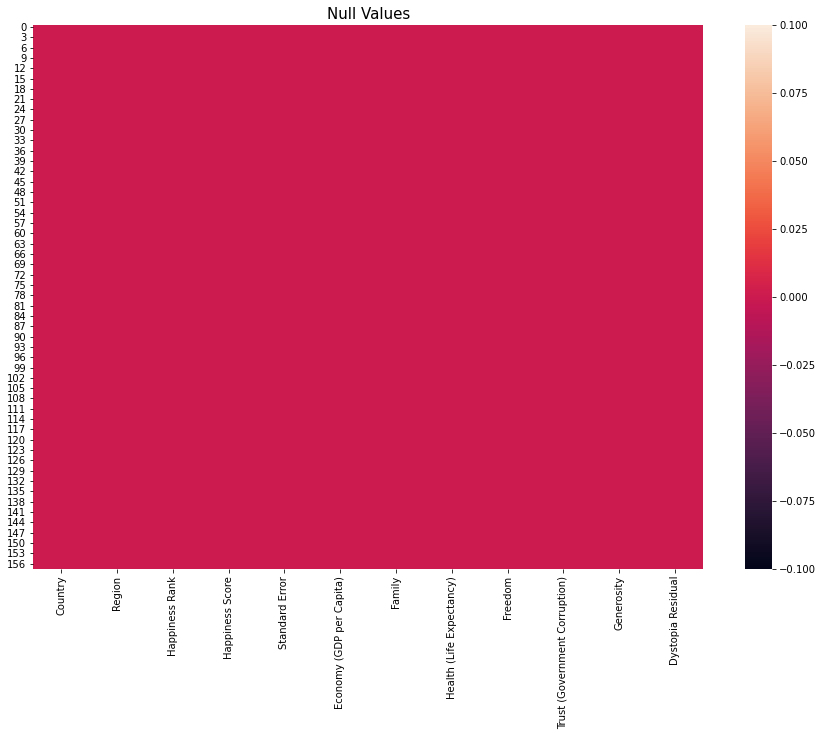

In [6]:
plt.figure(figsize=(15,10))
plt.title('Null Values',fontsize=15)
sns.heatmap(df.isnull())
plt.show()

--> No null values are present in dataset

In [7]:
## Getting Statistical Summary
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observation

1--Distribution of all features are likely to bell-Shape curve.

# Data Analysis

In [8]:
## Correlation with Happiness score
df.corr()['Happiness Score']

Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

<AxesSubplot:title={'center':'Correlation Plot'}>

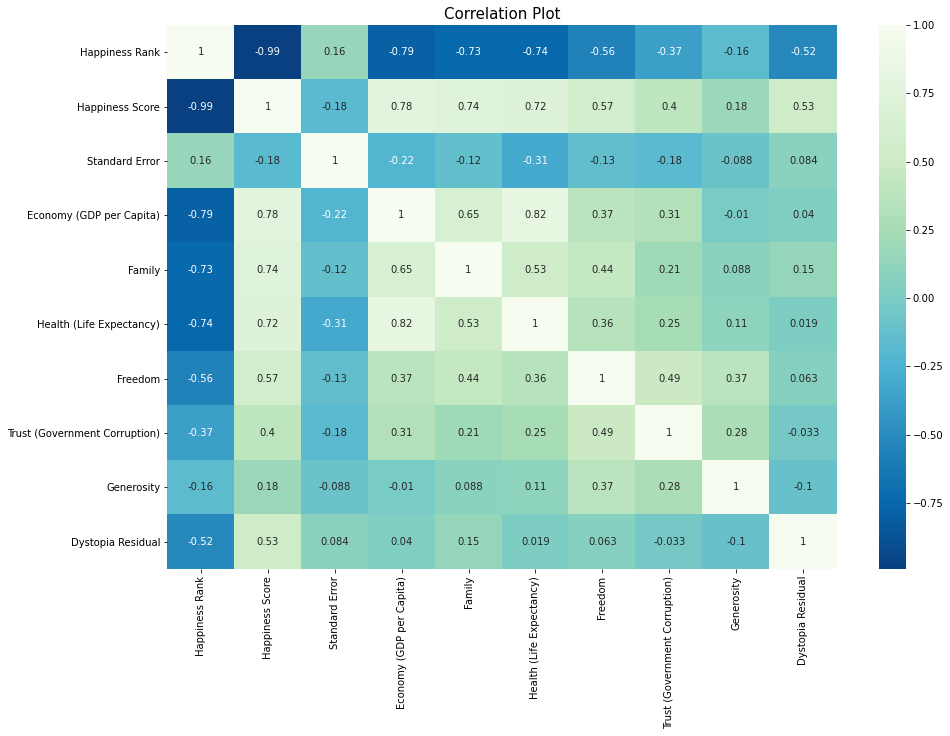

In [9]:
plt.figure(figsize=(15,10))
plt.title('Correlation Plot',fontsize=15)
sns.heatmap(df.corr(),cmap='GnBu_r',annot=True)

Observation-->

1-Economy is Highly positive correlated with Happiness score.

2-Family is 2nd postively correlated feature with Happiness score.

3-Health (Life Expectancy) is 3rd major aspect for deciding the happiness score as it is positivly correlated.

4- Freedom & Dystopia Residual have also more than 50% postive correaltion with happiness score.

5-Trust (Government Corruption) is also a deciding feature for happiness score.

# Top 10 Happiest Countries

In [10]:
top_10_happiest=df[:10].groupby('Country')['Happiness Rank'].max().sort_values(ascending=True)


In [11]:
top_10_happiest

Country
Switzerland     1
Iceland         2
Denmark         3
Norway          4
Canada          5
Finland         6
Netherlands     7
Sweden          8
New Zealand     9
Australia      10
Name: Happiness Rank, dtype: int64

In [12]:
top_10=df[['Country','Happiness Score']]
top_10

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
...,...,...
153,Rwanda,3.465
154,Benin,3.340
155,Syria,3.006
156,Burundi,2.905


# Bottom 10 Sad Country

In [13]:
Bottom_10_sad=df.groupby('Country')['Happiness Rank'].max().sort_values(ascending=False).head(10)

In [14]:
Bottom_10_sad

Country
Togo            158
Burundi         157
Syria           156
Benin           155
Rwanda          154
Afghanistan     153
Burkina Faso    152
Ivory Coast     151
Guinea          150
Chad            149
Name: Happiness Rank, dtype: int64

In [15]:
bottom_10=df[['Country','Happiness Score']].tail(10)

In [16]:
bottom_10

,Country,Happiness Score
148,Chad,3.667
149,Guinea,3.656
150,Ivory Coast,3.655
151,Burkina Faso,3.587
152,Afghanistan,3.575
153,Rwanda,3.465
154,Benin,3.340
155,Syria,3.006
156,Burundi,2.905
157,Togo,2.839


# Economy vs Happiness Score

<AxesSubplot:title={'center':'GDP vs Happiness Score'}, xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

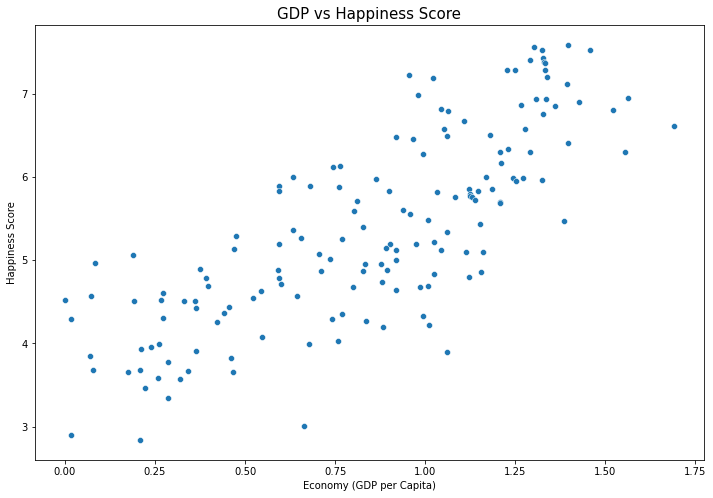

In [17]:
plt.figure(figsize=(12,8))
plt.title('GDP vs Happiness Score',fontsize=15)
sns.scatterplot(df['Economy (GDP per Capita)'],df['Happiness Score'],data=df)

Observation------>>

1- There is a linear relation between GDP and Happiness score.

2- Countries which have a good GDP growth, people are happy in these country.

In [18]:
Top_10_GDP=df.groupby('Country')['Economy (GDP per Capita)','Happiness Score','Happiness Rank'].max().sort_values(by='Happiness Rank',ascending=True).head(10)

In [19]:
Top_10_GDP

,Economy (GDP per Capita),Happiness Score,Happiness Rank
Country,,,
Switzerland,1.39651,7.587,1
Iceland,1.30232,7.561,2
Denmark,1.32548,7.527,3
Norway,1.45900,7.522,4
Canada,1.32629,7.427,5
Finland,1.29025,7.406,6
Netherlands,1.32944,7.378,7
Sweden,1.33171,7.364,8
New Zealand,1.25018,7.286,9


In [20]:
bottom_10_GDP=df.groupby('Country')['Economy (GDP per Capita)','Happiness Score','Happiness Rank'].max().sort_values(by='Happiness Rank',ascending=False).head(10)

In [21]:
bottom_10_GDP

,Economy (GDP per Capita),Happiness Score,Happiness Rank
Country,,,
Togo,0.20868,2.839,158
Burundi,0.01530,2.905,157
Syria,0.66320,3.006,156
Benin,0.28665,3.340,155
Rwanda,0.22208,3.465,154
Afghanistan,0.31982,3.575,153
Burkina Faso,0.25812,3.587,152
Ivory Coast,0.46534,3.655,151
Guinea,0.17417,3.656,150


# Family Vs Happiness Score

<AxesSubplot:title={'center':'Family vs Happiness Score'}, xlabel='Family', ylabel='Happiness Score'>

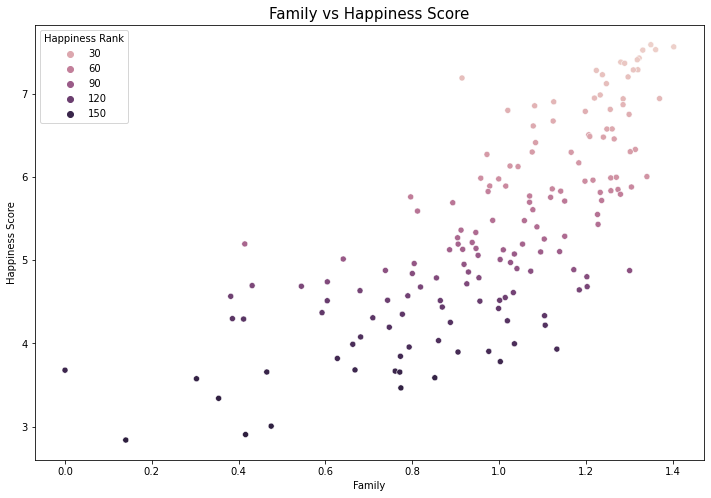

In [22]:
plt.figure(figsize=(12,8))
plt.title('Family vs Happiness Score',fontsize=15)
sns.scatterplot(df['Family'],df['Happiness Score'],hue='Happiness Rank',data=df)

Observation----->

1-- There is a Linear relation between family score and Happiness Score

2-- Top 10 Countries have a family score in range 1.3-1.4 (approx).

In [23]:
Top_10_Family=df.groupby('Country')['Family','Happiness Score','Happiness Rank'].max().sort_values(by='Happiness Rank',ascending=True).head(10)

In [24]:
## Family score of Top 10 Countries
Top_10_Family

,Family,Happiness Score,Happiness Rank
Country,,,
Switzerland,1.34951,7.587,1
Iceland,1.40223,7.561,2
Denmark,1.36058,7.527,3
Norway,1.33095,7.522,4
Canada,1.32261,7.427,5
Finland,1.31826,7.406,6
Netherlands,1.28017,7.378,7
Sweden,1.28907,7.364,8
New Zealand,1.31967,7.286,9


In [25]:
### Family Score of Bottom 10 Countries
bottom_10_Family=df.groupby('Country')['Family','Happiness Score','Happiness Rank'].max().sort_values(by='Happiness Rank',ascending=False).head(10)

In [26]:
bottom_10_Family

,Family,Happiness Score,Happiness Rank
Country,,,
Togo,0.13995,2.839,158
Burundi,0.41587,2.905,157
Syria,0.47489,3.006,156
Benin,0.35386,3.340,155
Rwanda,0.77370,3.465,154
Afghanistan,0.30285,3.575,153
Burkina Faso,0.85188,3.587,152
Ivory Coast,0.77115,3.655,151
Guinea,0.46475,3.656,150


# Health Vs Happiness Score

<AxesSubplot:title={'center':'Health vs Happiness Score'}, xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

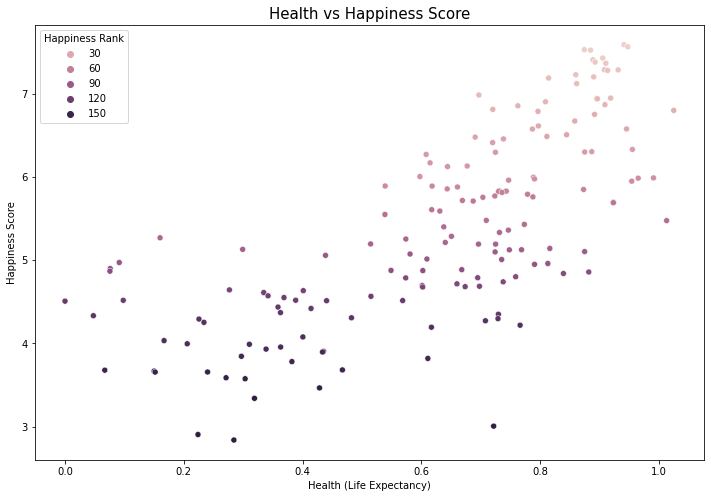

In [27]:
plt.figure(figsize=(12,8))
plt.title('Health vs Happiness Score',fontsize=15)
sns.scatterplot(df['Health (Life Expectancy)'],df['Happiness Score'],hue='Happiness Rank',data=df)

Obseravtion----->

1- There is a linear Relation between Happiness  score and Health.

2- Countries having good health score are showing a good happiness Score

In [28]:
Top_10_Health=df.groupby('Country')['Health (Life Expectancy)','Happiness Score','Happiness Rank'].max().sort_values(by='Happiness Rank',ascending=True).head(10)

In [29]:
Top_10_Health

,Health (Life Expectancy),Happiness Score,Happiness Rank
Country,,,
Switzerland,0.94143,7.587,1
Iceland,0.94784,7.561,2
Denmark,0.87464,7.527,3
Norway,0.88521,7.522,4
Canada,0.90563,7.427,5
Finland,0.88911,7.406,6
Netherlands,0.89284,7.378,7
Sweden,0.91087,7.364,8
New Zealand,0.90837,7.286,9


In [30]:
Bottom_10_Health=df.groupby('Country')['Health (Life Expectancy)','Happiness Score','Happiness Rank'].max().sort_values(by='Happiness Rank',ascending=False).head(10)

In [31]:
Bottom_10_Health

,Health (Life Expectancy),Happiness Score,Happiness Rank
Country,,,
Togo,0.28443,2.839,158
Burundi,0.22396,2.905,157
Syria,0.72193,3.006,156
Benin,0.31910,3.340,155
Rwanda,0.42864,3.465,154
Afghanistan,0.30335,3.575,153
Burkina Faso,0.27125,3.587,152
Ivory Coast,0.15185,3.655,151
Guinea,0.24009,3.656,150


# Freedom vs Happiness Score

<AxesSubplot:title={'center':'Freedom vs Happiness Score'}, xlabel='Freedom', ylabel='Happiness Score'>

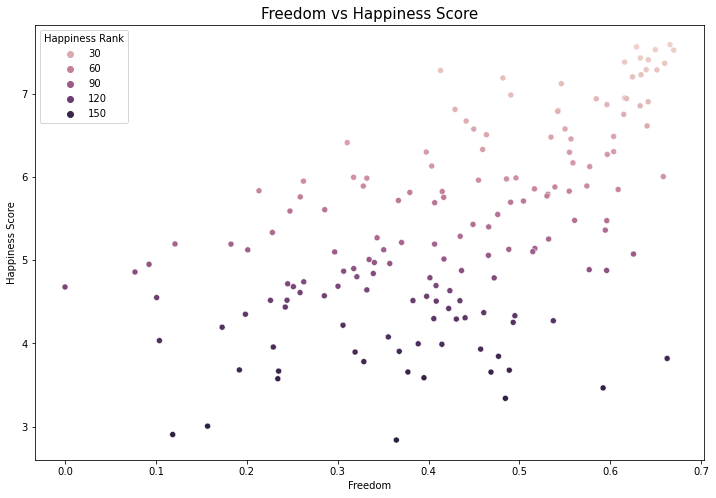

In [32]:
plt.figure(figsize=(12,8))
plt.title('Freedom vs Happiness Score',fontsize=15)
sns.scatterplot(df['Freedom'],df['Happiness Score'],hue='Happiness Rank',data=df)

# Observation---->

1- There is almost linear relation between Happiness Score and Freedom index.

2- Some countries have a low happiness score despite having a high Freedom index.

In [33]:
Top_10_Freedom=df.groupby('Country')['Freedom','Happiness Score','Happiness Rank'].max().sort_values(by='Happiness Rank',ascending=True).head(10)

In [34]:
Top_10_Freedom

,Freedom,Happiness Score,Happiness Rank
Country,,,
Switzerland,0.66557,7.587,1
Iceland,0.62877,7.561,2
Denmark,0.64938,7.527,3
Norway,0.66973,7.522,4
Canada,0.63297,7.427,5
Finland,0.64169,7.406,6
Netherlands,0.61576,7.378,7
Sweden,0.65980,7.364,8
New Zealand,0.63938,7.286,9


In [35]:
Bottom_10_Freedom=df.groupby('Country')['Freedom','Happiness Score','Happiness Rank'].max().sort_values(by='Happiness Rank',ascending=False).head(10)

In [36]:
Bottom_10_Freedom

,Freedom,Happiness Score,Happiness Rank
Country,,,
Togo,0.36453,2.839,158
Burundi,0.11850,2.905,157
Syria,0.15684,3.006,156
Benin,0.48450,3.340,155
Rwanda,0.59201,3.465,154
Afghanistan,0.23414,3.575,153
Burkina Faso,0.39493,3.587,152
Ivory Coast,0.46866,3.655,151
Guinea,0.37725,3.656,150


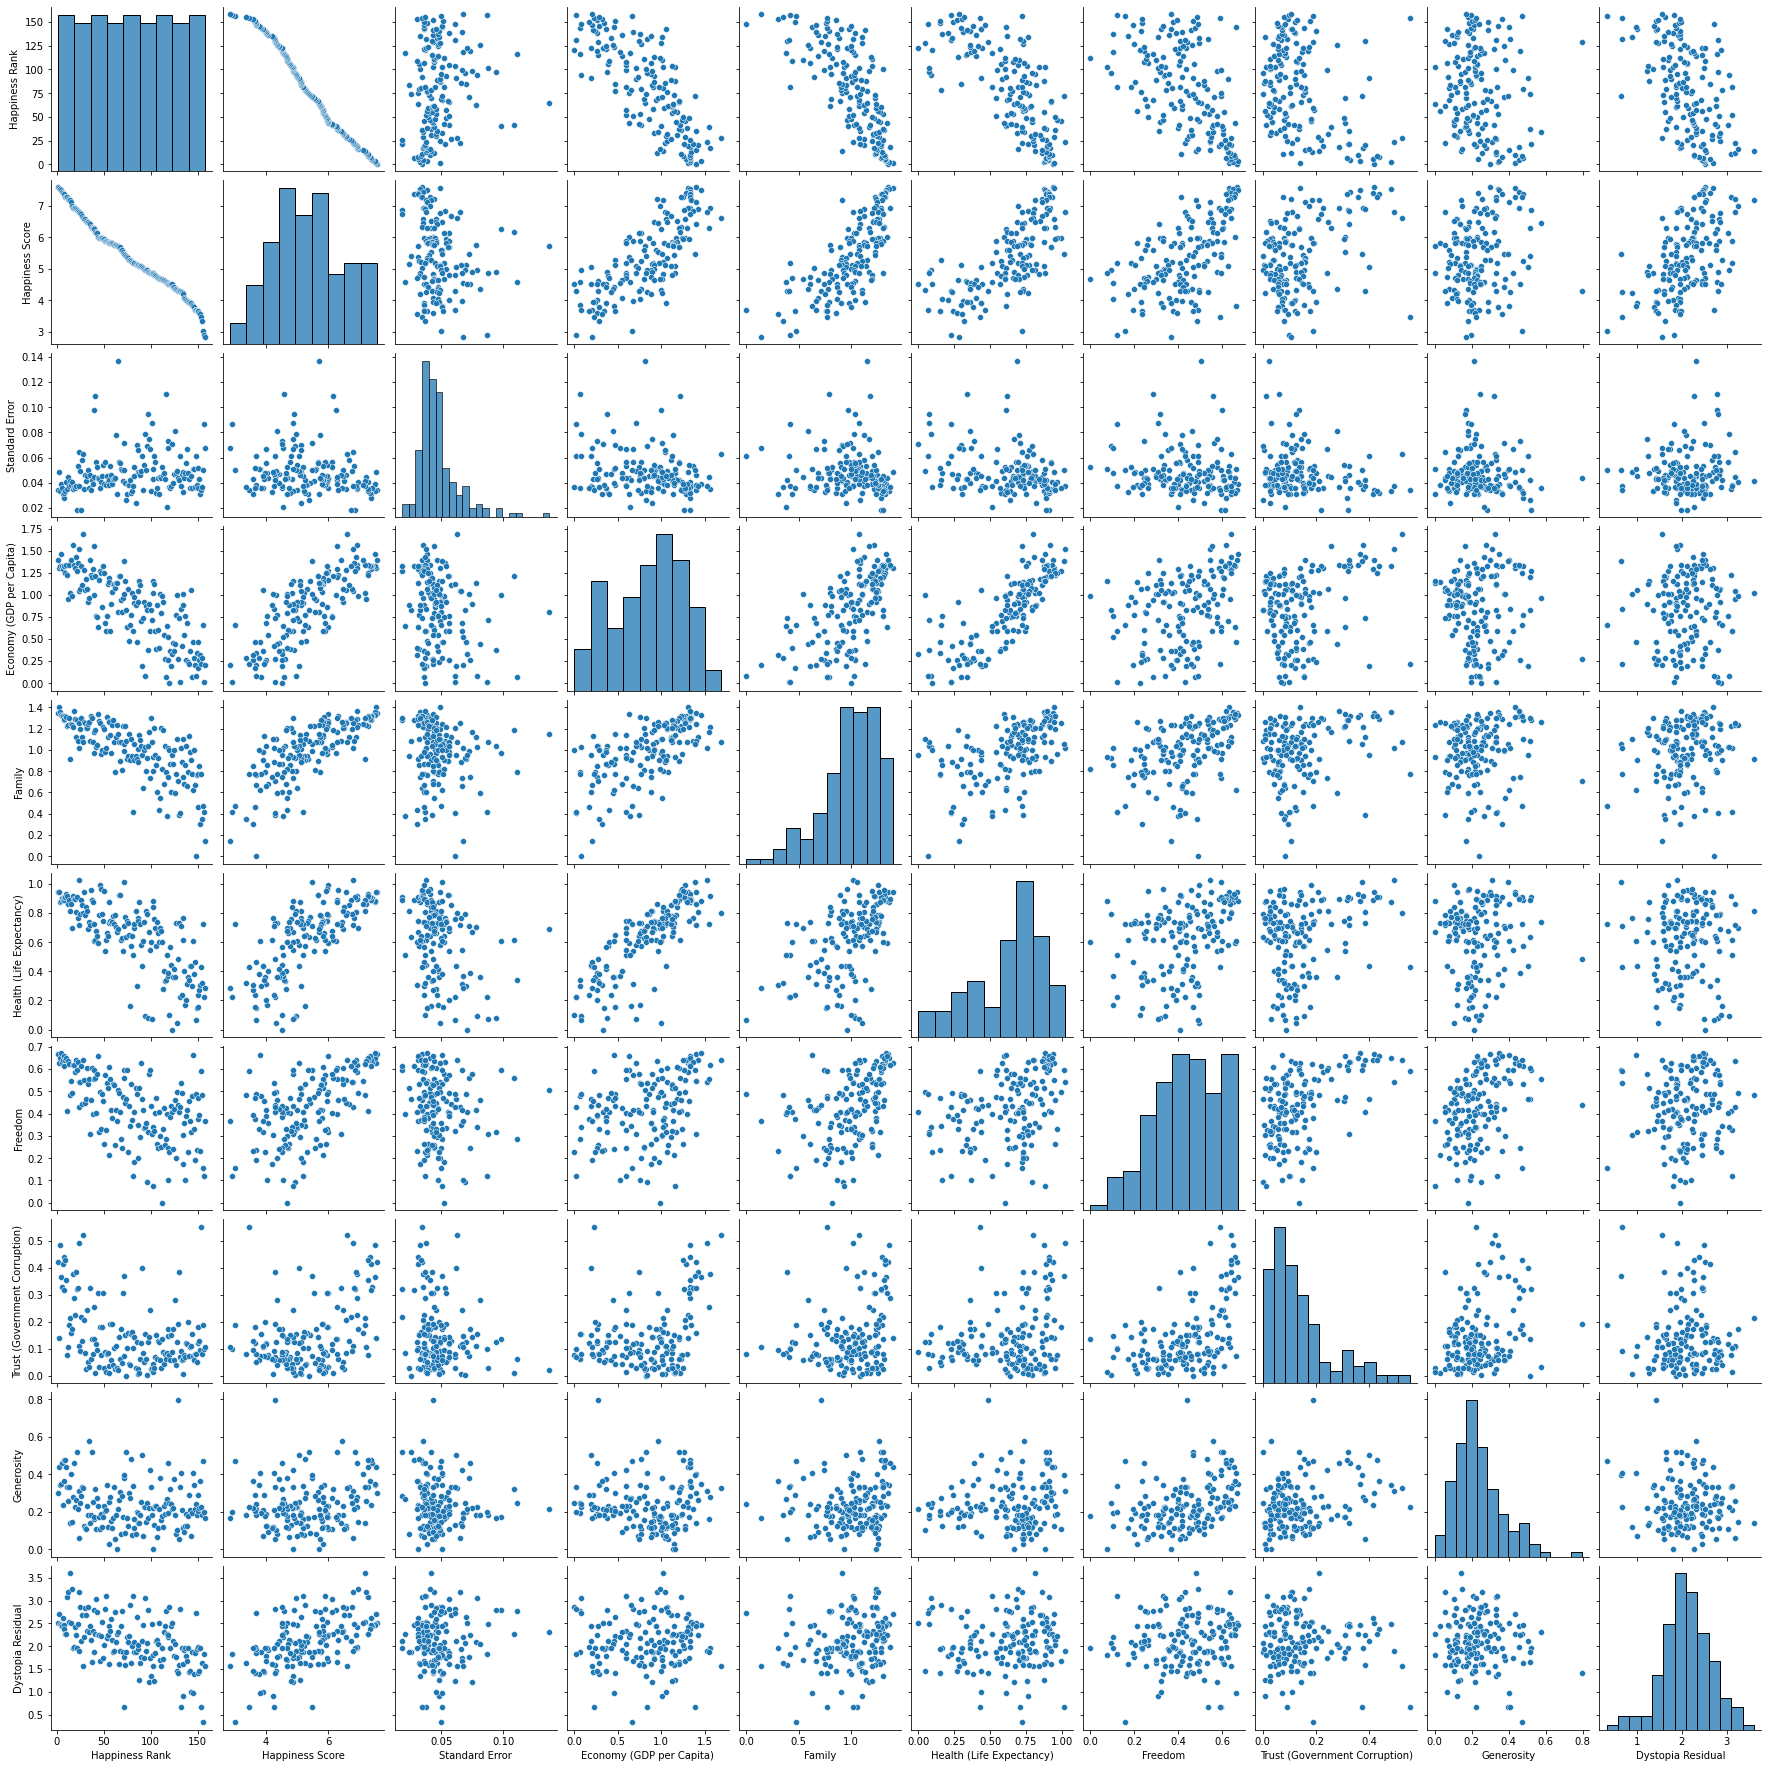

In [37]:
sns.pairplot(df)

Observation

1--Generosity and Standard Error are not showing any positive or -ve linear relation with Happiness Score.


# Distribution of Attributes

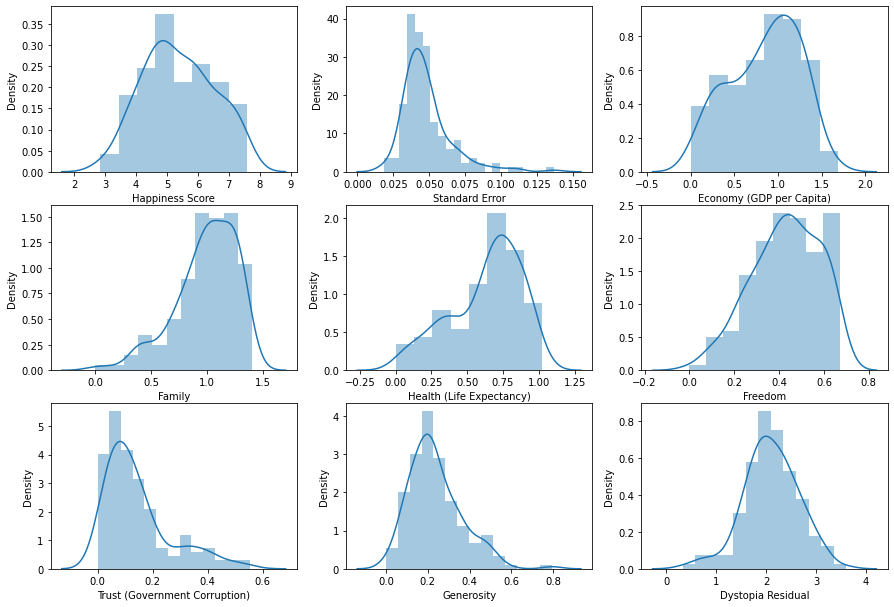

In [38]:
## Distribution of Each Continuous Attribute
di=df.select_dtypes('float') ## Select only float data types
plt.figure(figsize=(15,14))
plot=1
for i in di:
    if plot<=10:
        plt.subplot(4,3,plot)
        sns.distplot(di[i])
        plt.xlabel(i)
    plot=plot+1
plt.show()        

Observation:

1--Standard Error,Trust & Generosity are right skewed.

2-- Family, Freedom are left skewed.|

# Visualization of Outliers

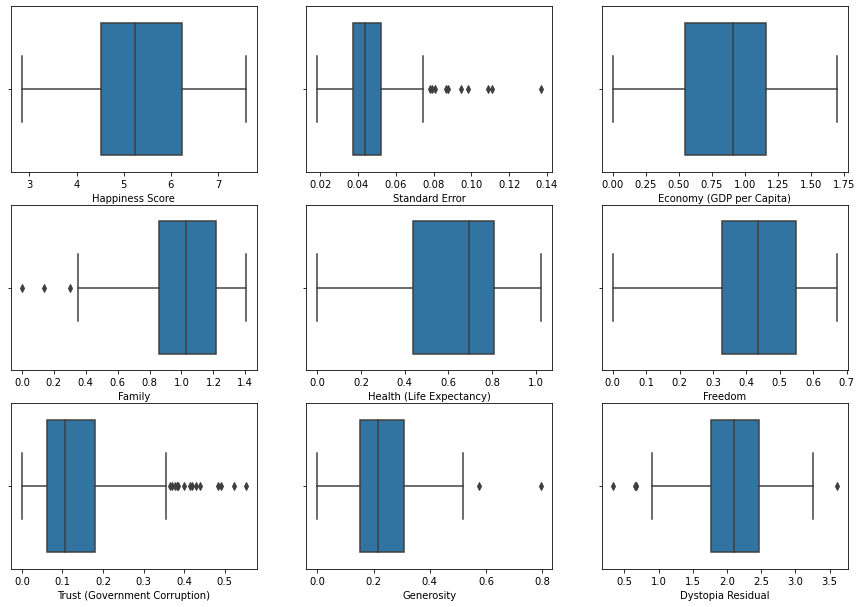

In [39]:
plt.figure(figsize=(15,14))
plot=1
for i in di:
    if plot<=10:
        plt.subplot(4,3,plot)
        sns.boxplot(di[i])
        plt.xlabel(i)
    plot=plot+1
plt.show() 

In [40]:
## Removing Outliers
from scipy.stats import zscore
z_score=zscore(di)
print(di.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape) ## 3.94 % data loss, we can bear upto 5-8% data loss.

(158, 9)
(152, 12)


# Skewness

In [41]:
## Cheaking outliers
df_1.skew()

Happiness Rank                  -0.002281
Happiness Score                  0.104863
Standard Error                   1.187230
Economy (GDP per Capita)        -0.369427
Family                          -1.028660
Health (Life Expectancy)        -0.733022
Freedom                         -0.393256
Trust (Government Corruption)    1.285137
Generosity                       0.655348
Dystopia Residual               -0.192006
dtype: float64

In [42]:
from scipy.stats import boxcox
for col in di:
    if df_1[col].skew()>=.5:
        df_1[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation
    if df_1[col].skew()<=-.5:
        df_1[col]=np.power(df_1[col],2)## For left skewed data we use square,power transformation

In [43]:
## Skewness Removed
df_1.skew()

Happiness Rank                  -0.002281
Happiness Score                  0.104863
Standard Error                   0.486950
Economy (GDP per Capita)        -0.369427
Family                          -0.273640
Health (Life Expectancy)        -0.045890
Freedom                         -0.393256
Trust (Government Corruption)   -0.068974
Generosity                       0.143203
Dystopia Residual               -0.192006
dtype: float64

In [44]:
df_1['Region'].value_counts()

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Western Europe                     21
Latin America and Caribbean        20
Middle East and Northern Africa    19
Southeastern Asia                   8
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

# Label Encoding

In [45]:
df_1['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'France', 'Argentina', 'Czech Republic',
       'Uruguay', 'Colombia', 'Thailand', 'Saudi Arabia', 'Spain',
       'Malta', 'Taiwan', 'Kuwait', 'Suriname', 'El Salvador',
       'Guatemala', 'Uzbekistan', 'Slovakia', 'Japan', 'South Korea',
       'Ecuador', 'Bahrain', 'Italy', 'Bolivia', 'Moldova', 'Paraguay',
       'Kazakhstan', 'Slovenia', 'Lithuania', 'Nicaragua', 'Peru',
       'Belarus', 'Poland', 'Malaysia', 'Croatia', 'Libya', 'Russia',
       'North Cyprus', 'Cyprus', 'Algeria', 'Kosovo', 'Turkmenistan',
       'Mauritius', 'Hong Kong', 'Estonia', 'Indonesia', 'Vietnam',
       'Turkey', 'Kyrgyzstan', 'Nig

In [46]:
df_1['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [47]:
### Dropping Country column as it has too many unique values.
df_1.drop(['Country','Happiness Rank'],axis=1,inplace=True)

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_1['Region']=le.fit_transform(df_1['Region'])


In [49]:
df_1.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.324310,1.39651,1.821177,0.886290,0.66557,0.748756,0.444928,2.51738
1,9,7.561,0.365532,1.30232,1.966249,0.898401,0.62877,0.521036,0.575250,2.70201
2,9,7.527,0.321658,1.32548,1.851178,0.764995,0.64938,0.784910,0.488465,2.49204
3,9,7.522,0.338540,1.45900,1.771428,0.783597,0.66973,0.714677,0.493793,2.46531
4,5,7.427,0.328749,1.32629,1.749297,0.820166,0.63297,0.690742,0.594265,2.45176


# Assigning X and Y variable

In [50]:
x=df_1.drop(['Happiness Score'],axis=1)
y=df_1[['Happiness Score']]

In [51]:
x

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,0.324310,1.39651,1.821177,0.886290,0.66557,0.748756,0.444928,2.51738
1,9,0.365532,1.30232,1.966249,0.898401,0.62877,0.521036,0.575250,2.70201
2,9,0.321658,1.32548,1.851178,0.764995,0.64938,0.784910,0.488465,2.49204
3,9,0.338540,1.45900,1.771428,0.783597,0.66973,0.714677,0.493793,2.46531
4,5,0.328749,1.32629,1.749297,0.820166,0.63297,0.690742,0.594265,2.45176
...,...,...,...,...,...,...,...,...,...
152,7,0.313597,0.31982,0.091718,0.092021,0.23414,0.459770,0.510828,1.95210
154,8,0.331896,0.28665,0.125217,0.101825,0.48450,0.431066,0.321860,1.63328
155,4,0.368771,0.66320,0.225521,0.521183,0.15684,0.573940,0.606037,0.32858
156,8,0.442391,0.01530,0.172948,0.050158,0.11850,0.465116,0.338876,1.83302


In [52]:
y

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
152,3.575
154,3.340
155,3.006
156,2.905


# Model Building

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Choosing best random state

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",i,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i
        

In [55]:
## Linear Regression
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.9950176763237605
r2 score corresponding to 43 is 0.9955629384808187
r2 score corresponding to 44 is 0.9924652120394671
r2 score corresponding to 45 is 0.9941705965866934
r2 score corresponding to 46 is 0.991118286469275
r2 score corresponding to 47 is 0.9890247786220729
r2 score corresponding to 48 is 0.9937197489612974
r2 score corresponding to 49 is 0.9869004786198621
r2 score corresponding to 50 is 0.9869391328725757
r2 score corresponding to 51 is 0.9928429403534272
r2 score corresponding to 52 is 0.9922471304329082
r2 score corresponding to 53 is 0.9901436273547182
r2 score corresponding to 54 is 0.9928323564040731
r2 score corresponding to 55 is 0.9900181647453153
r2 score corresponding to 56 is 0.9947221333167542
r2 score corresponding to 57 is 0.9914256357681173
r2 score corresponding to 58 is 0.9901306030001127
r2 score corresponding to 59 is 0.9946511700780345
r2 score corresponding to 60 is 0.9896959789270136
r2 score corresponding to 61 is 

In [56]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.8136654705383126
standard deviation in r2 score for Linear Regression 0.08793204696318652


In [57]:
## KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors, cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 5}

In [58]:
knn=KNeighborsRegressor(n_neighbors=5)
i=maxr2_score(knn,x,y)

r2 score corresponding to 42 is 0.8105038826897211
r2 score corresponding to 43 is 0.8469430702110124
r2 score corresponding to 44 is 0.8700812932710831
r2 score corresponding to 45 is 0.8934734418077118
r2 score corresponding to 46 is 0.8109573264616604
r2 score corresponding to 47 is 0.8934021639819436
r2 score corresponding to 48 is 0.779206238288305
r2 score corresponding to 49 is 0.850409978603812
r2 score corresponding to 50 is 0.7672211809115826
r2 score corresponding to 51 is 0.8556343151442062
r2 score corresponding to 52 is 0.7520472279405831
r2 score corresponding to 53 is 0.8093524593534722
r2 score corresponding to 54 is 0.825152913170649
r2 score corresponding to 55 is 0.6494723732839094
r2 score corresponding to 56 is 0.894967407800843
r2 score corresponding to 57 is 0.8120920707772029
r2 score corresponding to 58 is 0.8229225691313734
r2 score corresponding to 59 is 0.8195772196496953
r2 score corresponding to 60 is 0.7926124232879607
r2 score corresponding to 61 is 0.7

In [59]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for KNN Regression:",cross_val_score(knn,x,y,cv=7,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression",cross_val_score(knn,x,y,cv=7,scoring="r2").std())

Mean r2 score for KNN Regression: -11.16361198281352
standard deviation in r2 score for KNN Regression 4.595075938274752


In [60]:
## LAsso Regularization
from sklearn.linear_model import Lasso
lasso=Lasso()
parametors={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lasso,parametors,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [61]:
lasso=Lasso(alpha=0.001)
i=maxr2_score(lasso,x,y)

r2 score corresponding to 42 is 0.9961074106521829
r2 score corresponding to 43 is 0.9963811563111281
r2 score corresponding to 44 is 0.9921855390232236
r2 score corresponding to 45 is 0.994083975269935
r2 score corresponding to 46 is 0.9908880800164461
r2 score corresponding to 47 is 0.9891042448841045
r2 score corresponding to 48 is 0.9942004777075951
r2 score corresponding to 49 is 0.9865481813083725
r2 score corresponding to 50 is 0.9876311033858743
r2 score corresponding to 51 is 0.9926833318596096
r2 score corresponding to 52 is 0.9942903183715183
r2 score corresponding to 53 is 0.9908775667966475
r2 score corresponding to 54 is 0.9924134240546872
r2 score corresponding to 55 is 0.9909087854114816
r2 score corresponding to 56 is 0.9948061386603664
r2 score corresponding to 57 is 0.9910049030375839
r2 score corresponding to 58 is 0.9895805137489148
r2 score corresponding to 59 is 0.9944224172951501
r2 score corresponding to 60 is 0.9893614004938687
r2 score corresponding to 61 is 

In [62]:
print("Mean r2 score for Lasso Regression:",cross_val_score(lasso,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lasso,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression: 0.8115915635531803
standard deviation in r2 score for Lasso Regression 0.08772700781596737


In [63]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet()
parametors={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parametors,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [64]:
enr=ElasticNet(alpha=0.001)
i=maxr2_score(enr,x,y)

r2 score corresponding to 42 is 0.9959980436910199
r2 score corresponding to 43 is 0.996385363568481
r2 score corresponding to 44 is 0.9923013117860288
r2 score corresponding to 45 is 0.9940850268934794
r2 score corresponding to 46 is 0.9908398166320848
r2 score corresponding to 47 is 0.9892170110143265
r2 score corresponding to 48 is 0.9942388076119529
r2 score corresponding to 49 is 0.9866265166376263
r2 score corresponding to 50 is 0.9876884844383723
r2 score corresponding to 51 is 0.9926378352372238
r2 score corresponding to 52 is 0.9941719358244091
r2 score corresponding to 53 is 0.9908311976629971
r2 score corresponding to 54 is 0.9924442340209656
r2 score corresponding to 55 is 0.9909068546390605
r2 score corresponding to 56 is 0.9947279134102582
r2 score corresponding to 57 is 0.9911088229182561
r2 score corresponding to 58 is 0.9895406509715464
r2 score corresponding to 59 is 0.9944485257123111
r2 score corresponding to 60 is 0.9894536360648072
r2 score corresponding to 61 is 

In [65]:
print("Mean r2 score for Elastic net Regression:",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Elastic net Regression",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Elastic net Regression: 0.812629351375896
standard deviation in r2 score for Elastic net Regression 0.08790708215321423


In [66]:
from sklearn.linear_model import Ridge
rireg=Ridge()
parametors={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rireg,parametors,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [67]:
rireg=Ridge(alpha=0.1)
i=maxr2_score(rireg,x,y)

r2 score corresponding to 42 is 0.9955636899755355
r2 score corresponding to 43 is 0.9961171760329731
r2 score corresponding to 44 is 0.9924689838046308
r2 score corresponding to 45 is 0.9940818634141438
r2 score corresponding to 46 is 0.9909701389586087
r2 score corresponding to 47 is 0.9892946640952148
r2 score corresponding to 48 is 0.9941841023523681
r2 score corresponding to 49 is 0.9868155688053847
r2 score corresponding to 50 is 0.9876744249437043
r2 score corresponding to 51 is 0.9927347992829674
r2 score corresponding to 52 is 0.9935264947785251
r2 score corresponding to 53 is 0.9906611333677106
r2 score corresponding to 54 is 0.9926087510739084
r2 score corresponding to 55 is 0.9907081649989197
r2 score corresponding to 56 is 0.994742581426727
r2 score corresponding to 57 is 0.9911300860847769
r2 score corresponding to 58 is 0.9897526266003854
r2 score corresponding to 59 is 0.9945469407785419
r2 score corresponding to 60 is 0.9896530124595667
r2 score corresponding to 61 is 

In [68]:
print("Mean r2 score for Ridge Regression:",cross_val_score(rireg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Ridge Regression",cross_val_score(rireg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Ridge Regression: 0.8147968673644203
standard deviation in r2 score for Ridge Regression 0.08717549811730635


In [69]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x,y)
    print(sv.score(x,y))

0.9940179399700986
0.8860285645757647
0.9585971176401082


In [70]:
svm=SVR('linear')
i=maxr2_score(svm,x,y)

r2 score corresponding to 42 is 0.9964936106759168
r2 score corresponding to 43 is 0.9958295599262773
r2 score corresponding to 44 is 0.9923951974334548
r2 score corresponding to 45 is 0.9940862855929008
r2 score corresponding to 46 is 0.9919442243892432
r2 score corresponding to 47 is 0.9908297189228789
r2 score corresponding to 48 is 0.9939427874722578
r2 score corresponding to 49 is 0.9864315200897281
r2 score corresponding to 50 is 0.9873116262565854
r2 score corresponding to 51 is 0.9930865225784011
r2 score corresponding to 52 is 0.9937866448137745
r2 score corresponding to 53 is 0.9908049677288776
r2 score corresponding to 54 is 0.9921837616279441
r2 score corresponding to 55 is 0.9911995426675138
r2 score corresponding to 56 is 0.9947467328821363
r2 score corresponding to 57 is 0.9908431850190887
r2 score corresponding to 58 is 0.9905910087715183
r2 score corresponding to 59 is 0.9942213691375157
r2 score corresponding to 60 is 0.9898765822742608
r2 score corresponding to 61 is

In [71]:
print("Mean r2 score for SVR :",cross_val_score(svm,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for SVR",cross_val_score(svm,x,y,cv=5,scoring="r2").std())

Mean r2 score for SVR : 0.8152327711691811
standard deviation in r2 score for SVR 0.08076602023147139


In [72]:
dt=DecisionTreeRegressor()
i=maxr2_score(dt,x,y)

r2 score corresponding to 42 is 0.7679148980991872
r2 score corresponding to 43 is 0.8149439532512763
r2 score corresponding to 44 is 0.7773181911103668
r2 score corresponding to 45 is 0.8490974194233447
r2 score corresponding to 46 is 0.7290485208149573
r2 score corresponding to 47 is 0.7338580400606802
r2 score corresponding to 48 is 0.7052012255868918
r2 score corresponding to 49 is 0.7280511278609318
r2 score corresponding to 50 is 0.755786306775126
r2 score corresponding to 51 is 0.8162988775880778
r2 score corresponding to 52 is 0.7002403029084643
r2 score corresponding to 53 is 0.6701378835269223
r2 score corresponding to 54 is 0.6790056043949066
r2 score corresponding to 55 is 0.6482576903521422
r2 score corresponding to 56 is 0.8505082498983842
r2 score corresponding to 57 is 0.7287933864042846
r2 score corresponding to 58 is 0.7201103425877973
r2 score corresponding to 59 is 0.6762467428221962
r2 score corresponding to 60 is 0.7042716666588275
r2 score corresponding to 61 is 

In [73]:
print("Mean r2 score for Decision Tree Regressor :",cross_val_score(dt,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Decision Tree Regressor",cross_val_score(dt,x,y,cv=5,scoring="r2").std())

Mean r2 score for Decision Tree Regressor : -7.959358939938906
standard deviation in r2 score for Decision Tree Regressor 1.3824818193584278


In [74]:
rf=RandomForestRegressor()
i=maxr2_score(rf,x,y)

r2 score corresponding to 42 is 0.9104321269927838
r2 score corresponding to 43 is 0.9020916577978878
r2 score corresponding to 44 is 0.926065834194884
r2 score corresponding to 45 is 0.9585815062182091
r2 score corresponding to 46 is 0.9031429390515785
r2 score corresponding to 47 is 0.8887018060381913
r2 score corresponding to 48 is 0.8546243025565962
r2 score corresponding to 49 is 0.9275770636138279
r2 score corresponding to 50 is 0.8336482316745906
r2 score corresponding to 51 is 0.9088805197019254
r2 score corresponding to 52 is 0.9195828796781043
r2 score corresponding to 53 is 0.9023579086763257
r2 score corresponding to 54 is 0.8625629966404016
r2 score corresponding to 55 is 0.795147296712797
r2 score corresponding to 56 is 0.9721823672268344
r2 score corresponding to 57 is 0.8990197837608169
r2 score corresponding to 58 is 0.8834537645660259
r2 score corresponding to 59 is 0.8869313323692837
r2 score corresponding to 60 is 0.9312467892292196
r2 score corresponding to 61 is 0

In [75]:
print("Mean r2 score for Decision Tree Regressor :",cross_val_score(rf,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Decision Tree Regressor",cross_val_score(rf,x,y,cv=5,scoring="r2").std())

Mean r2 score for Decision Tree Regressor : -3.634778494339636
standard deviation in r2 score for Decision Tree Regressor 2.1706525176114244


# Hence, Ridge Regressor is our Best Model

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=.20)
ridge=Ridge(alpha=.1)
ridge.fit(x_train,y_train)
pred=ridge.predict(x_test)

In [77]:
print('ERROR')
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score',r2_score(y_test,pred))

ERROR
MAE 0.049704020766558374
MSE 0.00406226454642403
RMSE 0.06373589684333335
R2_score 0.9970280406195143


# Saving Model

In [78]:
import joblib
joblib.dump(ridge,'Happiness_report.pkl')

['Happiness_report.pkl']